In [1]:
! pip install numpy pandas matplotlib seaborn sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read X_train first 3 rows for header
df_X_header = pd.read_csv("X_train.csv", dtype = str, nrows = 3,header = None)

#combine df_X_header by row
X_header = []
for ic in range(len(df_X_header.columns)):
    temp = ""
    for ir in range(len(df_X_header)):
        if(ir != 0):
            temp += "&"
        temp += df_X_header.iloc[ir,ic]
    X_header.append(temp)
    


#read X_train csv files except first 3 rows 
X_train = pd.read_csv("X_train.csv",
                         skiprows = 3,
                         header = None)

X_valid = pd.read_csv("X_valid.csv",
                          skiprows = 3,
                          header = None)

X_test = pd.read_csv("X_test.csv", skiprows = 3, header = None)

#combine header and the data together
X_train.columns = X_header
X_valid.columns = X_header
X_test.columns = X_header

#read Y_train csv file
Y_train = pd.read_csv("Y_train.csv")
Y_valid = pd.read_csv("Y_valid.csv")

In [4]:
X_id = X_train.iloc[:,0]
X_feat = X_train.iloc[:,1:]
X_feat_valid=X_valid.iloc[:,1:]
X_feat_test = X_test.iloc[:,1:]
print(X_feat.shape)
print(X_feat_valid.shape)
print(X_feat_test.shape)

(16760, 7488)
(2394, 7488)
(4790, 7488)


# Data Pre-processing and Primary Feature Selection

In [5]:
#Two principles to conduct primary features Selection
    #1. Only select the features mean of the variable by time
    #2. Only select the either one feature among the features group with low covariance (< 0.9)

### 1. Select the features mean

In [6]:
def featureSelectByMean(df_feat,df_header,cols = None):
    if (cols == None):
        cols = np.full((df_feat.shape[1],), False, dtype = bool)
    for ic in range(len(df_header.columns)):
        if (df_header.iloc[1,ic] == "mean"):
            cols[ic] = True
    
    print("Select features with mean value:")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))        
    return df_feat.iloc[:,cols]
    

X_feat = featureSelectByMean(X_feat,df_X_header)
X_feat_valid = featureSelectByMean(X_feat_valid,df_X_header)
X_feat_test = featureSelectByMean(X_feat_test,df_X_header)

X_feat.describe()
X_feat_valid.describe()
X_feat_test.describe()

Select features with mean value:
Original: 7488 	Selected: 2496
Select features with mean value:
Original: 7488 	Selected: 2496
Select features with mean value:
Original: 7488 	Selected: 2496


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&mean&3,alanine aminotransferase&mean&4,alanine aminotransferase&mean&5,alanine aminotransferase&mean&6,alanine aminotransferase&mean&7,alanine aminotransferase&mean&8,alanine aminotransferase&mean&9,alanine aminotransferase&mean&10,...,white blood cell count urine&mean&15,white blood cell count urine&mean&16,white blood cell count urine&mean&17,white blood cell count urine&mean&18,white blood cell count urine&mean&19,white blood cell count urine&mean&20,white blood cell count urine&mean&21,white blood cell count urine&mean&22,white blood cell count urine&mean&23,white blood cell count urine&time_since_measured&0
count,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,...,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000
mean,-0.070541,-0.070551,-0.070941,-0.070423,-0.071757,-0.071704,-0.071733,-0.071604,-0.071407,-0.071840,...,-0.007049,-0.007075,-0.007086,-0.007123,-0.007451,-0.007431,-0.007431,-0.007431,-0.007423,234.260752
std,0.326064,0.327378,0.322871,0.328198,0.321893,0.324621,0.323230,0.324994,0.326737,0.321858,...,0.281726,0.281732,0.281732,0.281755,0.280869,0.280864,0.280864,0.280864,0.280856,265.224255
min,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,...,-0.314682,-0.314682,-0.314682,-0.314682,-0.314682,-0.314682,-0.314682,-0.314682,-0.314682,0.000000
25%,-0.245904,-0.245904,-0.245904,-0.245904,-0.245904,-0.245904,-0.245904,-0.245904,-0.245904,-0.245904,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,139.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,314.000000
max,8.520390,8.520390,7.750385,7.750385,7.750385,7.750385,7.723649,7.723649,7.723649,7.723649,...,9.150296,9.150296,9.150296,9.150296,9.150296,9.150296,9.150296,9.150296,9.150296,1577.000000


### Replace '0' with column mean 

In [7]:
X_feat_column=list(X_feat.columns)
##replace all the 0 to NaN --> To aviod 0 counted in the mean calculation
X_feat=X_feat.replace(0,np.nan)

##Change all NaN to their column mean 
def replace_zero(X_data):
    for i in list(X_data.columns):
        current_mean=X_data[i].mean()
        X_data[i]=X_data[i].replace(np.nan,current_mean)
    return X_data

X_feat = replace_zero(X_feat)
X_feat.describe()

,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&mean&3,alanine aminotransferase&mean&4,alanine aminotransferase&mean&5,alanine aminotransferase&mean&6,alanine aminotransferase&mean&7,alanine aminotransferase&mean&8,alanine aminotransferase&mean&9,alanine aminotransferase&mean&10,...,white blood cell count urine&mean&15,white blood cell count urine&mean&16,white blood cell count urine&mean&17,white blood cell count urine&mean&18,white blood cell count urine&mean&19,white blood cell count urine&mean&20,white blood cell count urine&mean&21,white blood cell count urine&mean&22,white blood cell count urine&mean&23,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.141552,-0.140184,-0.140650,-0.139125,-0.138974,-0.138283,-0.138701,-0.139286,-0.140297,-0.140765,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,282.458378
std,0.417218,0.423197,0.421912,0.429907,0.430609,0.433016,0.430047,0.427235,0.420908,0.414654,...,0.339445,0.338852,0.338695,0.338709,0.338701,0.338701,0.338710,0.338710,0.338263,310.242366
min,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,...,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,1.000000
25%,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,72.000000
50%,-0.141552,-0.140184,-0.140650,-0.139125,-0.138974,-0.138283,-0.138701,-0.139286,-0.140297,-0.140765,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,180.000000
75%,-0.141552,-0.140184,-0.140650,-0.139125,-0.138974,-0.138283,-0.138701,-0.139286,-0.140297,-0.140765,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,360.000000
max,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,...,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,2232.000000


In [8]:
X_feat_valid = replace_zero(X_feat_valid)
X_feat_valid.describe()
X_feat_test = replace_zero(X_feat_test)
X_feat_test.describe()

,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&mean&3,alanine aminotransferase&mean&4,alanine aminotransferase&mean&5,alanine aminotransferase&mean&6,alanine aminotransferase&mean&7,alanine aminotransferase&mean&8,alanine aminotransferase&mean&9,alanine aminotransferase&mean&10,...,white blood cell count urine&mean&15,white blood cell count urine&mean&16,white blood cell count urine&mean&17,white blood cell count urine&mean&18,white blood cell count urine&mean&19,white blood cell count urine&mean&20,white blood cell count urine&mean&21,white blood cell count urine&mean&22,white blood cell count urine&mean&23,white blood cell count urine&time_since_measured&0
count,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,...,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000
mean,-0.070541,-0.070551,-0.070941,-0.070423,-0.071757,-0.071704,-0.071733,-0.071604,-0.071407,-0.071840,...,-0.007049,-0.007075,-0.007086,-0.007123,-0.007451,-0.007431,-0.007431,-0.007431,-0.007423,234.260752
std,0.326064,0.327378,0.322871,0.328198,0.321893,0.324621,0.323230,0.324994,0.326737,0.321858,...,0.281726,0.281732,0.281732,0.281755,0.280869,0.280864,0.280864,0.280864,0.280856,265.224255
min,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,...,-0.314682,-0.314682,-0.314682,-0.314682,-0.314682,-0.314682,-0.314682,-0.314682,-0.314682,0.000000
25%,-0.245904,-0.245904,-0.245904,-0.245904,-0.245904,-0.245904,-0.245904,-0.245904,-0.245904,-0.245904,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,139.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,314.000000
max,8.520390,8.520390,7.750385,7.750385,7.750385,7.750385,7.723649,7.723649,7.723649,7.723649,...,9.150296,9.150296,9.150296,9.150296,9.150296,9.150296,9.150296,9.150296,9.150296,1577.000000


### 2. Select features with low covariance

In [9]:
def featureSelectByCorr(df_feat,threshold = 0.9):
    corr = df_feat.corr()
    
    cols = np.full((corr.shape[0],), True, dtype = bool)
    for i in range(corr.shape[0],0,-1):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if(cols[j]):
                    cols[j] = False
    print("Select features by filtering features with high covariance","(>= "+str(threshold)+")",":")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))
    
    return df_feat.iloc[:,cols]

X_feat = featureSelectByCorr(X_feat,0.9)
X_feat.describe()

Select features by filtering features with high covariance (>= 0.9) :
Original: 2496 	Selected: 401


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&time_since_measured&0,albumin&mean&1,albumin&time_since_measured&0,albumin ascites&mean&1,albumin ascites&time_since_measured&0,albumin pleural&mean&1,albumin pleural&time_since_measured&0,albumin urine&mean&1,...,total protein urine&time_since_measured&0,troponin-i&mean&1,troponin-t&mean&1,troponin-t&time_since_measured&0,venous pvo2&mean&1,weight&mean&1,weight&time_since_measured&0,white blood cell count&mean&1,white blood cell count urine&mean&1,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,1.676000e+04,16760.000000,16760.000000,16760.000000,1.676000e+04,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.141552,-0.140184,45.100105,0.090500,56.868421,6.905796e-16,6920.953601,0.016125,8739.370574,3.254159e-18,...,1565.460133,-0.086947,-0.087665,82.114555,-0.032239,-0.022179,35.731152,0.001112,-0.001404,282.458378
std,0.417218,0.423197,33.099299,0.618241,44.778725,5.462116e-02,6258.569824,0.051815,8123.735314,5.516467e-02,...,1776.261364,0.167579,0.502631,80.141575,0.123496,0.811971,31.636408,0.962887,0.338098,310.242366
min,-0.279057,-0.279057,1.000000,-3.131888,1.000000,-1.702985e+00,2.000000,-2.312068,1.000000,-5.691630e-01,...,1.000000,-0.692272,-0.366371,1.000000,-2.765677,-3.517696,1.000000,-1.160785,-0.316046,1.000000
25%,-0.248043,-0.248043,24.000000,0.090500,24.000000,6.073573e-16,2161.500000,0.016125,2244.750000,2.775558e-17,...,405.000000,-0.086947,-0.087665,27.000000,-0.032239,-0.405690,20.000000,-0.414731,-0.001404,72.000000
50%,-0.141552,-0.140184,45.100105,0.090500,49.000000,6.073573e-16,5159.500000,0.016125,6216.000000,2.775558e-17,...,999.500000,-0.086947,-0.087665,71.000000,-0.032239,-0.022179,30.000000,-0.120972,-0.001404,180.000000
75%,-0.141552,-0.140184,48.000000,0.090500,69.000000,6.073573e-16,9888.000000,0.016125,13056.000000,2.775558e-17,...,2034.250000,-0.086947,-0.087665,96.000000,-0.032239,0.122018,35.731152,0.228741,-0.001404,360.000000
max,10.413320,10.413320,336.000000,3.492301,480.000000,3.469357e+00,31735.000000,1.613770,36853.000000,4.592960e+00,...,11424.000000,3.830272,8.913147,768.000000,3.207278,7.198578,431.000000,54.802581,11.783246,2232.000000


In [10]:
X_feat_valid=X_feat_valid[X_feat.columns]
X_feat_test=X_feat_test[X_feat.columns]
print(X_feat_valid.shape)
print(X_feat_test.shape)
X_feat_valid.describe()
X_feat_test.describe()

(2394, 401)
(4790, 401)


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&time_since_measured&0,albumin&mean&1,albumin&time_since_measured&0,albumin ascites&mean&1,albumin ascites&time_since_measured&0,albumin pleural&mean&1,albumin pleural&time_since_measured&0,albumin urine&mean&1,...,total protein urine&time_since_measured&0,troponin-i&mean&1,troponin-t&mean&1,troponin-t&time_since_measured&0,venous pvo2&mean&1,weight&mean&1,weight&time_since_measured&0,white blood cell count&mean&1,white blood cell count urine&mean&1,white blood cell count urine&time_since_measured&0
count,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,...,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000,4790.000000
mean,-0.070541,-0.070551,34.806472,0.018838,47.645094,0.000665,8770.317954,0.000943,10441.293946,-0.001324,...,1136.260543,-0.004856,-0.033835,65.243215,-0.001734,-0.011726,25.992484,-0.012914,-0.006855,234.260752
std,0.326064,0.327378,41.309692,0.617760,51.276238,0.036753,7863.865681,0.048931,9962.052273,0.027064,...,1011.809586,0.150023,0.485854,81.083923,0.103162,0.822448,32.448799,0.779088,0.281803,265.224255
min,-0.279057,-0.279057,0.000000,-2.987884,0.000000,-0.517657,0.000000,-0.898766,0.000000,-0.561162,...,0.000000,-0.691352,-0.366371,0.000000,-1.630816,-3.517696,0.000000,-1.160785,-0.314682,0.000000
25%,-0.245904,-0.245904,0.000000,0.000000,13.000000,0.000000,2040.000000,0.000000,2560.750000,0.000000,...,358.250000,0.000000,-0.072490,9.000000,0.000000,-0.412420,2.000000,-0.424056,0.000000,48.000000
50%,0.000000,0.000000,24.000000,0.000000,30.000000,0.000000,6799.000000,0.000000,7381.500000,0.000000,...,839.000000,0.000000,0.000000,39.000000,0.000000,0.000000,21.000000,-0.132629,0.000000,139.000000
75%,0.000000,0.000000,48.000000,0.000000,70.000000,0.000000,14003.000000,0.000000,15206.750000,0.000000,...,1632.000000,0.000000,0.000000,93.000000,0.000000,0.134410,31.000000,0.228741,0.000000,314.000000
max,8.520390,8.520390,312.000000,3.636305,383.000000,1.637486,30791.000000,2.555972,38464.000000,0.455031,...,5304.000000,3.765914,8.913147,784.000000,2.848900,6.844782,264.000000,27.040052,9.150296,1577.000000


In [11]:
#Standardization of features
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_feat_std = std_scaler.fit_transform(X_feat)
X_feat_valid_std = std_scaler.transform(X_feat_valid)
X_feat_test_std = std_scaler.transform(X_feat_test)

#print(X_feat_std)
#print(X_feat_valid_std)

In [12]:
#Check the shape of the datasets

print(X_feat_std.shape)
print(X_feat_valid_std.shape)
print(X_feat_test_std.shape)
print(Y_train.shape)
print(Y_valid.shape)

(16760, 401)
(2394, 401)
(4790, 401)
(16760, 2)
(2394, 2)


# Additional Feature Selection for Multiple Linear Regression Model

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot

def select_features(X_train, y_train, X_valid, X_test, k):
    fs = SelectKBest(score_func=f_regression, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_feat_fs = fs.transform(X_train)
    # transform test input data
    X_valid_fs = fs.transform(X_valid)
    X_test_fs = fs.transform(X_test)
    return X_feat_fs, X_valid_fs, X_test_fs, fs

Feature 0: 0.014712
Feature 1: 0.018317
Feature 2: 2.415431
Feature 3: 151.335662
Feature 4: 1.196545
Feature 5: 1.312398
Feature 6: 0.916931
Feature 7: 0.025215
Feature 8: 1.044492
Feature 9: 0.076064
Feature 10: 6.726820
Feature 11: 0.207650
Feature 12: 43.461277
Feature 13: 2.211620
Feature 14: 1.977538
Feature 15: 1.658021
Feature 16: 3.375085
Feature 17: 6.899082
Feature 18: 2.895213
Feature 19: 10.997812
Feature 20: 130.919055
Feature 21: 1.758944
Feature 22: 24.522183
Feature 23: 7.420775
Feature 24: 26.665308
Feature 25: 15.813286
Feature 26: 0.296226
Feature 27: 0.211624
Feature 28: 0.624387
Feature 29: 3.777147
Feature 30: 0.122871
Feature 31: 0.162060
Feature 32: 1.463306
Feature 33: 3.019068
Feature 34: 2.719652
Feature 35: 2.779536
Feature 36: 1.752621
Feature 37: 3.375976
Feature 38: 1.236560
Feature 39: 1.082446
Feature 40: 0.641276
Feature 41: 0.371149
Feature 42: 0.079476
Feature 43: 0.000301
Feature 44: 0.062474
Feature 45: 1.079722
Feature 46: 1.943955
Feature 47: 4.

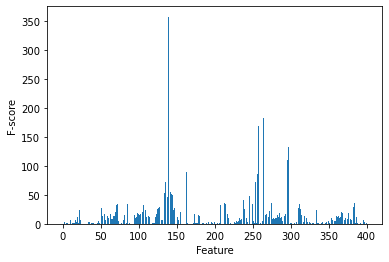

In [14]:
# configure to select all the STANDARDIZED features
X_feat_std_fs, X_valid_std_fs, X_test_std_fs,std_fs = select_features(X_feat_std, Y_train.iloc[:,1], X_feat_valid_std,X_feat_test_std,'all')

# computing F-scores for the features
for i in range(len(std_fs.scores_)):
    print('Feature %d: %f' % (i, std_fs.scores_[i]))

# plot the F-scores
pyplot.bar([i for i in range(len(std_fs.scores_))], std_fs.scores_)
pyplot.xlabel("Feature")
pyplot.ylabel("F-score")
pyplot.show()

In [15]:
#Check number of features with F-scores >= a certain value

def f_count(score_list):
    fs_more_than_200, fs_more_than_150, fs_more_than_100, fs_more_than_50 = 0, 0, 0, 0
    fs_more_than_40, fs_more_than_30, fs_more_than_20, fs_more_than_10 = 0, 0, 0, 0
    for i in range(len(score_list)):
        if score_list[i] >= 200:
            fs_more_than_200 += 1
        if score_list[i] >= 150:
            fs_more_than_150 += 1
        if score_list[i] >= 100:
            fs_more_than_100 += 1
        if score_list[i] >= 50:
            fs_more_than_50 += 1
        if score_list[i] >= 40:
            fs_more_than_40 += 1
        if score_list[i] >= 30:
            fs_more_than_30 += 1
        if score_list[i] >= 20:
            fs_more_than_20 += 1
        if score_list[i] >= 10:
            fs_more_than_10 += 1
        else:
            continue
    print("No. of features with F-score >= 200:", fs_more_than_200,
          "\nNo. of features with F-score >= 150:", fs_more_than_150,
          "\nNo. of features with F-score >= 100:", fs_more_than_100,
          "\nNo. of features with F-score >= 50:", fs_more_than_50,
          "\nNo. of features with F-score >= 40:", fs_more_than_40,
          "\nNo. of features with F-score >= 30:", fs_more_than_30,
          "\nNo. of features with F-score >= 20:", fs_more_than_20,
          "\nNo. of features with F-score >= 10:", fs_more_than_10)

f_count(std_fs.scores_)

No. of features with F-score >= 200: 1 
No. of features with F-score >= 150: 6 
No. of features with F-score >= 100: 12 
No. of features with F-score >= 50: 25 
No. of features with F-score >= 40: 32 
No. of features with F-score >= 30: 45 
No. of features with F-score >= 20: 79 
No. of features with F-score >= 10: 155


# Fitting Multiple Linear Regression Model to data

For k = 1 :
R^2 score: 0.02467410985508589
RMSE: 1.9695395073342417
For k = 2 :
R^2 score: 0.029277969085019562
RMSE: 1.9648855714363302
For k = 3 :
R^2 score: 0.03211724601285437
RMSE: 1.9620099080213944
For k = 4 :
R^2 score: 0.03831686876846219
RMSE: 1.9557161384182797
For k = 5 :
R^2 score: 0.03932047928960647
RMSE: 1.9546953813809105
For k = 6 :
R^2 score: 0.045149285760425095
RMSE: 1.9487564206233323
For k = 7 :
R^2 score: 0.04567617426458592
RMSE: 1.9482186826169317
For k = 8 :
R^2 score: 0.047145920978240774
RMSE: 1.9467178863205437
For k = 9 :
R^2 score: 0.046986683007176566
RMSE: 1.9468805442044539
For k = 10 :
R^2 score: 0.049787831206210775
RMSE: 1.9440172504608055
For k = 11 :
R^2 score: 0.04984385884351372
RMSE: 1.9439599367878202
For k = 12 :
R^2 score: 0.04936710288032864
RMSE: 1.9444475820403233
For k = 13 :
R^2 score: 0.048564111883147354
RMSE: 1.9452686373221166
For k = 14 :
R^2 score: 0.052389283992003266
RMSE: 1.9413543003315867
For k = 15 :
R^2 score: 0.0528558960

For k = 122 :
R^2 score: 0.0712511645538082
RMSE: 1.9219361764324323
For k = 123 :
R^2 score: 0.07085934706726238
RMSE: 1.922341543721516
For k = 124 :
R^2 score: 0.07106908550682822
RMSE: 1.922124562756186
For k = 125 :
R^2 score: 0.071010877250826
RMSE: 1.9221847834702497
For k = 126 :
R^2 score: 0.07094280768158334
RMSE: 1.9222552040437022
For k = 127 :
R^2 score: 0.07106404404964417
RMSE: 1.922129778588379
For k = 128 :
R^2 score: 0.0708426631405431
RMSE: 1.9223588027131286
For k = 129 :
R^2 score: 0.07058362522638806
RMSE: 1.922626749320777
For k = 130 :
R^2 score: 0.07059874735839611
RMSE: 1.922611108142851
For k = 131 :
R^2 score: 0.06996474680900455
RMSE: 1.9232667607410934
For k = 132 :
R^2 score: 0.07002040946259536
RMSE: 1.9232092060769315
For k = 133 :
R^2 score: 0.06993210916841797
RMSE: 1.9233005069557558
For k = 134 :
R^2 score: 0.0699321659836819
RMSE: 1.9233004482112122
For k = 135 :
R^2 score: 0.0698545576234455
RMSE: 1.9233806902510435
For k = 136 :
R^2 score: 0.0698

For k = 240 :
R^2 score: 0.06748462718933623
RMSE: 1.9258294355733276
For k = 241 :
R^2 score: 0.06749138723437409
RMSE: 1.9258224551429277
For k = 242 :
R^2 score: 0.0681113989840545
RMSE: 1.9251821226712091
For k = 243 :
R^2 score: 0.06785794795332489
RMSE: 1.9254439062258104
For k = 244 :
R^2 score: 0.06992742908832172
RMSE: 1.9233053459514824
For k = 245 :
R^2 score: 0.07022516893264008
RMSE: 1.9229974718731309
For k = 246 :
R^2 score: 0.07023840107846813
RMSE: 1.9229837881979779
For k = 247 :
R^2 score: 0.06874206347418022
RMSE: 1.9245305697436972
For k = 248 :
R^2 score: 0.0682897372871154
RMSE: 1.924997899932441
For k = 249 :
R^2 score: 0.06829468379892412
RMSE: 1.92499278995466
For k = 250 :
R^2 score: 0.06824836619263963
RMSE: 1.9250406376745952
For k = 251 :
R^2 score: 0.06825569060513137
RMSE: 1.9250330713774773
For k = 252 :
R^2 score: 0.06782279249580303
RMSE: 1.9254802146527792
For k = 253 :
R^2 score: 0.06821713815896113
RMSE: 1.925072896662933
For k = 254 :
R^2 score: 0

For k = 358 :
R^2 score: 0.06997287301941735
RMSE: 1.9232583584227598
For k = 359 :
R^2 score: 0.0704697093980231
RMSE: 1.922744571060341
For k = 360 :
R^2 score: 0.07052624717875988
RMSE: 1.9226860956318739
For k = 361 :
R^2 score: 0.0704146565639634
RMSE: 1.9228015089415522
For k = 362 :
R^2 score: 0.07022095779563453
RMSE: 1.923001826689144
For k = 363 :
R^2 score: 0.06998717822906708
RMSE: 1.9232435670693537
For k = 364 :
R^2 score: 0.06962755073238791
RMSE: 1.923615381523118
For k = 365 :
R^2 score: 0.06963799560586226
RMSE: 1.9236045837100055
For k = 366 :
R^2 score: 0.06959329920711987
RMSE: 1.9236507900063047
For k = 367 :
R^2 score: 0.06963987756563628
RMSE: 1.9236026381510396
For k = 368 :
R^2 score: 0.06889761658044147
RMSE: 1.9243698305978951
For k = 369 :
R^2 score: 0.06884261432693184
RMSE: 1.9244266681251536
For k = 370 :
R^2 score: 0.06883666485937523
RMSE: 1.9244328160094504
For k = 371 :
R^2 score: 0.06904090745805636
RMSE: 1.9242217506141812
For k = 372 :
R^2 score: 

Text(0.5, 1.0, 'R squared')

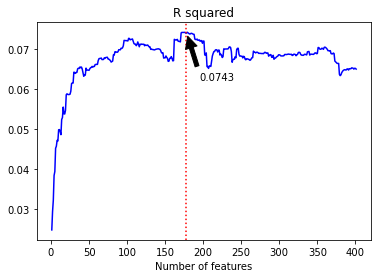

In [17]:
#Fit MLR

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def mlr_fit(X_train, X_valid, X_test,Y_train, Y_valid):
    R2_score = []
    RMSE_list = []
    avg_RMSE_list = []
    k_list =[]
    for k_val in range(1,402):
        k_list.append(k_val)
        X_feat_fs, X_valid_fs, X_test_fs,fs = select_features(X_train, Y_train.iloc[:,1], X_valid,X_test,k_val)
        #fit data with selected K features to model
        model = LinearRegression()
        model.fit(X_feat_fs, Y_train.iloc[:,1])
        Y_pred = model.predict(X_valid_fs)
        #evaluate predictions
        print("For k =", k_val, ":")
        print("R^2 score:", model.score(X_valid_fs, Y_valid.iloc[:,1]))
        R2_score.append(model.score(X_valid_fs, Y_valid.iloc[:,1]))
        print("RMSE:", np.sqrt(mean_squared_error(Y_valid.iloc[:,1], Y_pred)))
        RMSE_list.append(np.sqrt(mean_squared_error(Y_valid.iloc[:,1], Y_pred)))
    return R2_score, RMSE_list, k_list
    
R2_score, RMSE_list, k_list = mlr_fit(X_feat_std, X_feat_valid_std, X_feat_test_std, Y_train, Y_valid)

#Plot R squared graph
plt.plot(k_list, R2_score, color='b')
plt.xlabel('Number of features')
plt.axvline(np.argmax(R2_score),linestyle="dotted",color="red")
plt.annotate(np.max(R2_score).round(4),(np.argmax(R2_score),np.max(R2_score)),xycoords="data",xytext=(30,-50),textcoords="offset pixels",arrowprops=dict(facecolor="black",shrink=0.1),fontsize=10,horizontalalignment="center",verticalalignment="bottom")
plt.title('R squared')

Text(0.5, 1.0, 'RMSE')

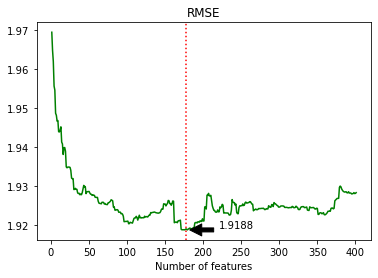

In [18]:
#Plot RMSE graph

plt.plot(k_list, RMSE_list, color='g')
plt.axvline(np.argmin(RMSE_list),linestyle="dotted",color="red")
plt.annotate(np.min(RMSE_list).round(4),(np.argmin(RMSE_list),np.min(RMSE_list)),xycoords="data",xytext=(50,0),textcoords="offset pixels",arrowprops=dict(facecolor="black",shrink=0.1),fontsize=10,horizontalalignment="center",verticalalignment="bottom")
plt.xlabel('Number of features')
plt.title('RMSE')

In [21]:
#Intercept and coefficient of MLR model
X_feat_fs, X_valid_fs, X_test_fs,fs = select_features(X_feat_std, Y_train.iloc[:,1], X_feat_valid_std,X_feat_test_std,179)
#fit data with selected K features to model
model = LinearRegression()
model.fit(X_feat_fs, Y_train.iloc[:,1])
Y_pred = model.predict(X_test_fs)

print("Intercept:", model.intercept_,
      "\nCoefficients:", model.coef_)

Intercept: 3.3682290064527534 
Coefficients: [-1.01562612e-01  5.61289214e-03  1.14627637e-02  1.00706027e-01
 -1.89548055e-02 -2.16129821e-03 -7.70001582e-03  1.39129312e-02
  1.32950052e-02 -2.20333634e-02 -1.09404835e-02  1.35751852e-02
  9.74805633e-03 -2.23009733e-02  1.05784261e-02 -1.72480564e-02
 -2.20847304e-02  1.78882932e-04  3.21733959e-02 -2.62817302e-02
  1.84513794e-02 -2.92174933e-02 -1.16171429e-02  2.58030636e-02
  5.62780114e-03  1.02830265e-02  4.23112680e-02 -4.66120907e-02
  1.14946776e-03 -4.87346711e-03 -5.89981085e-02  2.62419535e-02
  1.37959106e-02  1.76274688e-02 -2.69258823e-03 -2.66751795e-02
  1.66527558e-02 -6.20407247e-03  7.44296489e-03  3.19323472e-03
 -1.00738703e-03 -4.48167537e-02 -2.19878161e-03 -5.26648778e-02
  1.71950829e-02 -2.95094627e-02 -1.94538472e-02  2.89176804e-02
  2.67557278e-02  4.52742523e-03 -5.30741811e-03 -4.12359951e-04
  8.29442071e-03 -2.53500542e-02  6.43100436e-02  3.54438312e-03
  3.16432090e-02 -3.32896453e-02  3.49645826e

# Supplementary codes
## Cross-validation 

For k = 1 :
Average RMSE: 1.955506227245083
For k = 2 :
Average RMSE: 1.9455190824664519
For k = 3 :
Average RMSE: 1.94222327941151
For k = 4 :
Average RMSE: 1.9338125701070097
For k = 5 :
Average RMSE: 1.9334885002535245
For k = 6 :
Average RMSE: 1.9274438294125207
For k = 7 :
Average RMSE: 1.927196554127638
For k = 8 :
Average RMSE: 1.9270992970235463
For k = 9 :
Average RMSE: 1.9273090797492918
For k = 10 :
Average RMSE: 1.9215650690229273
For k = 11 :
Average RMSE: 1.9217164953925676
For k = 12 :
Average RMSE: 1.9216961802987353
For k = 13 :
Average RMSE: 1.9218699275656244
For k = 14 :
Average RMSE: 1.9190772567750798
For k = 15 :
Average RMSE: 1.91870222478194
For k = 16 :
Average RMSE: 1.917374181666573
For k = 17 :
Average RMSE: 1.9138598471849055
For k = 18 :
Average RMSE: 1.9139098651226834
For k = 19 :
Average RMSE: 1.9138199982008226
For k = 20 :
Average RMSE: 1.9124442937662274
For k = 21 :
Average RMSE: 1.9107865206304395
For k = 22 :
Average RMSE: 1.9109152129552383
For 

For k = 179 :
Average RMSE: 1.9101276697206948
For k = 180 :
Average RMSE: 1.9102274624339926
For k = 181 :
Average RMSE: 1.9102118720377979
For k = 182 :
Average RMSE: 1.910262604264346
For k = 183 :
Average RMSE: 1.9107409363900507
For k = 184 :
Average RMSE: 1.9109010564651123
For k = 185 :
Average RMSE: 1.9110325506551527
For k = 186 :
Average RMSE: 1.9111043795822071
For k = 187 :
Average RMSE: 1.9112381489862522
For k = 188 :
Average RMSE: 1.912207086249176
For k = 189 :
Average RMSE: 1.9121369350227608
For k = 190 :
Average RMSE: 1.9114426173258643
For k = 191 :
Average RMSE: 1.9115996577928605
For k = 192 :
Average RMSE: 1.9117428470428681
For k = 193 :
Average RMSE: 1.9115911736586915
For k = 194 :
Average RMSE: 1.911579812254808
For k = 195 :
Average RMSE: 1.911801575908065
For k = 196 :
Average RMSE: 1.911851985360685
For k = 197 :
Average RMSE: 1.9117463620245054
For k = 198 :
Average RMSE: 1.9121901471500247
For k = 199 :
Average RMSE: 1.9123159856707823
For k = 200 :
Aver

For k = 355 :
Average RMSE: 1.9142298618732798
For k = 356 :
Average RMSE: 1.9142219354506023
For k = 357 :
Average RMSE: 1.9146712237196104
For k = 358 :
Average RMSE: 1.9146272547723626
For k = 359 :
Average RMSE: 1.9145850441150742
For k = 360 :
Average RMSE: 1.9145857515393856
For k = 361 :
Average RMSE: 1.9147373779152235
For k = 362 :
Average RMSE: 1.9147626022319717
For k = 363 :
Average RMSE: 1.914752137813913
For k = 364 :
Average RMSE: 1.9147059685823085
For k = 365 :
Average RMSE: 1.9148077806874155
For k = 366 :
Average RMSE: 1.9147171164370256
For k = 367 :
Average RMSE: 1.9147747612009742
For k = 368 :
Average RMSE: 1.9147126685962856
For k = 369 :
Average RMSE: 1.9147240778465882
For k = 370 :
Average RMSE: 1.914880166071353
For k = 371 :
Average RMSE: 1.9149360271617941
For k = 372 :
Average RMSE: 1.915053662002014
For k = 373 :
Average RMSE: 1.9147488342256096
For k = 374 :
Average RMSE: 1.9147208411313505
For k = 375 :
Average RMSE: 1.9148685661659024
For k = 376 :
Av

Text(0.5, 1.0, 'Cross-validation RMSE')

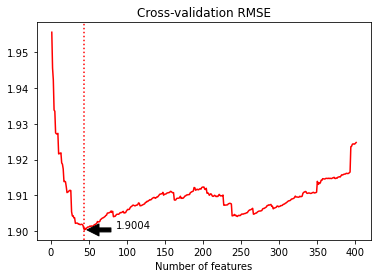

In [20]:
# Cross-validation with 5 folds
def cv_mlr_fit(X_train, X_valid, X_test,Y_train, Y_valid):
    avg_RMSE_list = []
    cv_k_list =[]
    for cv_k_val in range(1,402):
        cv_k_list.append(cv_k_val)
        X_feat_fs, X_valid_fs, X_test_fs,fs = select_features(X_train, Y_train.iloc[:,1], X_valid,X_test,cv_k_val)
        #fit data with selected K features to model
        model = LinearRegression()
        model.fit(X_feat_fs, Y_train.iloc[:,1])
        Y_pred = model.predict(X_valid_fs)
        #define cross-validation method to use
        cv = KFold(n_splits=5, random_state=1, shuffle=True) 
        #use LOOCV to evaluate model
        scores = cross_val_score(model,X_feat_fs,Y_train.iloc[:,1],scoring='neg_mean_squared_error',cv=cv,n_jobs=-1)
        #evaluate predictions
        print("For k =", cv_k_val, ":")
        #view average RMSE
        print("Average RMSE:", np.sqrt(np.mean(np.absolute(scores))))
        avg_RMSE_list.append(np.sqrt(np.mean(np.absolute(scores))))
    return avg_RMSE_list, cv_k_list
    
avg_RMSE_list, cv_k_list = cv_mlr_fit(X_feat_std, X_feat_valid_std,X_feat_test_std, Y_train, Y_valid)

#Plot cross-validation RMSE graph
plt.plot(cv_k_list, avg_RMSE_list,color='r')
plt.axvline(np.argmin(avg_RMSE_list),linestyle="dotted",color="red")
plt.annotate(np.min(avg_RMSE_list).round(4),(np.argmin(avg_RMSE_list),np.min(avg_RMSE_list)),xycoords="data",xytext=(50,0),textcoords="offset pixels",arrowprops=dict(facecolor="black",shrink=0.1),fontsize=10,horizontalalignment="center",verticalalignment="bottom")
plt.xlabel('Number of features')
plt.title('Cross-validation RMSE')

## Polynomial and Interaction Features

In [20]:
#Fit MLR with polynomial and interaction features (k=25)

X_feat_fs, X_valid_fs, X_test_fs,fs = select_features(X_feat_std, Y_train.iloc[:,1], X_feat_valid_std, X_feat_test_std,25)
#Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False)
poly_X_feat = poly.fit_transform(X_feat_fs)
poly_X_valid = poly.fit_transform(X_valid_fs)
#fit data with selected K features to model
model = LinearRegression()
model.fit(poly_X_feat, Y_train.iloc[:,1])
poly_Y_pred = model.predict(poly_X_valid)
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
#use LOOCV to evaluate model
scores = cross_val_score(model,X_feat_fs,Y_train.iloc[:,1],scoring='neg_mean_squared_error',cv=cv,n_jobs=-1)
#evaluate predictions
print("For k =", 25, ":")
print("R^2 score:", model.score(poly_X_valid, Y_valid.iloc[:,1]))
print("RMSE:", np.sqrt(mean_squared_error(Y_valid.iloc[:,1], poly_Y_pred)))  
print("Average RMSE:", np.sqrt(np.mean(np.absolute(scores))))
    


For k = 25 :
R^2 score: 0.04433646854418072
RMSE: 1.9495856841915382
Average RMSE: 1.9114319563828528


## Deep Neural Network

For k = 1 :
R^2: 0.03437960165706089
RMSE: 1.9597155386728304
For k = 2 :
R^2: 0.06793797804906898
RMSE: 1.9253612488843488
For k = 3 :
R^2: 0.07805266008508815
RMSE: 1.914885798315386
For k = 4 :
R^2: 0.07689932600685767
RMSE: 1.9160831621381824
For k = 5 :
R^2: 0.08397112440598253
RMSE: 1.9087295734343168
For k = 6 :
R^2: 0.08037693747090191
RMSE: 1.912470511544571
For k = 7 :
R^2: 0.08665403772684377
RMSE: 1.9059323302102469
For k = 8 :
R^2: 0.07599739594931132
RMSE: 1.9170190032207448
For k = 9 :
R^2: 0.0762285315236515
RMSE: 1.9167792208872132
For k = 10 :
R^2: 0.07527873668004237
RMSE: 1.9177643559365969
For k = 11 :
R^2: 0.08561032157796511
RMSE: 1.9070210109835892
For k = 12 :
R^2: 0.0906337050819006
RMSE: 1.9017754951064483
For k = 13 :
R^2: 0.0696170187027988
RMSE: 1.92362626937604
For k = 14 :
R^2: 0.05959643335737186
RMSE: 1.9339576259801508
For k = 15 :
R^2: 0.05291795527096177
RMSE: 1.9408126847547464
For k = 16 :
R^2: 0.07475124086497364
RMSE: 1.9183112604405872
For k = 

For k = 131 :
R^2: -0.39105901125139586
RMSE: 2.352136912401855
For k = 132 :
R^2: -0.5617617476498915
RMSE: 2.4922821736157954
For k = 133 :
R^2: -0.31916999980279903
RMSE: 2.290552252910031
For k = 134 :
R^2: -0.4782294089237913
RMSE: 2.4247152254731055
For k = 135 :
R^2: -0.4177993242938036
RMSE: 2.3746368499080974
For k = 136 :
R^2: -0.44620831469958033
RMSE: 2.3983096089919904
For k = 137 :
R^2: -0.5560010413943297
RMSE: 2.4876814175867343
For k = 138 :
R^2: -0.624338401291751
RMSE: 2.5417221654507087
For k = 139 :
R^2: -0.5660919215581222
RMSE: 2.495734859361851
For k = 140 :
R^2: -0.45058417300208853
RMSE: 2.40193520578548
For k = 141 :
R^2: -0.5246323609482806
RMSE: 2.46247815921928
For k = 142 :
R^2: -0.584632926353275
RMSE: 2.510464926617472
For k = 143 :
R^2: -0.5194133934919054
RMSE: 2.458259893020305
For k = 144 :
R^2: -0.5517781375604109
RMSE: 2.4843034067533307
For k = 145 :
R^2: -0.6481436044594937
RMSE: 2.5602793015999654
For k = 146 :
R^2: -0.45157382066552665
RMSE: 2

For k = 261 :
R^2: -0.9328768983307223
RMSE: 2.7726300008490443
For k = 262 :
R^2: -1.01551760716462
RMSE: 2.8312819395878313
For k = 263 :
R^2: -0.8729247709739518
RMSE: 2.7292919058337204
For k = 264 :
R^2: -0.7788166789355149
RMSE: 2.6598394122276723
For k = 265 :
R^2: -0.577120622319895
RMSE: 2.5045071491463817
For k = 266 :
R^2: -0.7641471726032434
RMSE: 2.648849154131484
For k = 267 :
R^2: -0.8325600687627575
RMSE: 2.69972128128639
For k = 268 :
R^2: -0.7145551431489947
RMSE: 2.6113527946356467
For k = 269 :
R^2: -0.7610916375131507
RMSE: 2.646554232457463
For k = 270 :
R^2: -0.9464526391879311
RMSE: 2.7823498760794685
For k = 271 :
R^2: -1.0072285827333878
RMSE: 2.8254539716119753
For k = 272 :
R^2: -0.7098033431131721
RMSE: 2.6077316700098105
For k = 273 :
R^2: -0.7970163749327597
RMSE: 2.673411658933776
For k = 274 :
R^2: -0.9682736006124317
RMSE: 2.797902357544806
For k = 275 :
R^2: -0.9054102508600586
RMSE: 2.7528596432366346
For k = 276 :
R^2: -0.8076607174763375
RMSE: 2.68

For k = 391 :
R^2: -1.1052944973395245
RMSE: 2.8936516525197993
For k = 392 :
R^2: -0.9427238987891546
RMSE: 2.7796835811177223
For k = 393 :
R^2: -1.094239973100943
RMSE: 2.8860446303868055
For k = 394 :
R^2: -0.9812849989300698
RMSE: 2.8071349805620907
For k = 395 :
R^2: -0.8605265525595385
RMSE: 2.7202433461054225
For k = 396 :
R^2: -0.767177700586344
RMSE: 2.6511233314532103
For k = 397 :
R^2: -0.936443881589879
RMSE: 2.7751871647913204
For k = 398 :
R^2: -0.8852027666557298
RMSE: 2.738223256088251
For k = 399 :
R^2: -1.0181190243428881
RMSE: 2.8331085101863835
For k = 400 :
R^2: -0.8392793417318565
RMSE: 2.704666157787666
For k = 401 :
R^2: -0.9615783695249835
RMSE: 2.7931396659962826


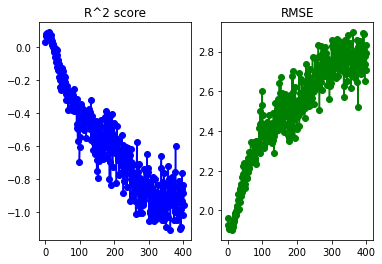

In [24]:
#Deep Neural Network
from sklearn.neural_network import MLPRegressor

nw_R2_score = []
nw_RMSE_list = []
nw_k_list=[]
for k_val in range(1,402):
    nw_k_list.append(k_val)
    X_feat_fs, X_valid_fs, X_test_fs,fs = select_features(X_feat_std, Y_train.iloc[:,1], X_feat_valid_std,X_feat_test_std,k_val)
    regr = MLPRegressor(random_state=1, max_iter=500).fit(X_feat_fs, Y_train.iloc[:,1])
    regr_Y_pred = regr.predict(X_valid_fs)
    print("For k =", k_val, ":")
    r2 = regr.score(X_valid_fs, Y_valid.iloc[:,1])
    print("R^2:", r2)
    nw_R2_score.append(r2)
    RMSE = np.sqrt(mean_squared_error(Y_valid.iloc[:,1], regr_Y_pred))
    print("RMSE:", RMSE)
    nw_RMSE_list.append(RMSE)

fig, ax = plt.subplots(1,2)
ax[0].plot(nw_k_list, nw_R2_score, marker='o', color='b')
ax[0].title.set_text('R^2 score')
ax[1].plot(nw_k_list, nw_RMSE_list, marker='o', color='g')
ax[1].title.set_text('RMSE')